In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Importing dataset
diabetes = pd.read_csv("C:\\Users\\Parul\\Desktop\\DATASETS\\diabetes.csv")
diabetes.shape

(768, 9)

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


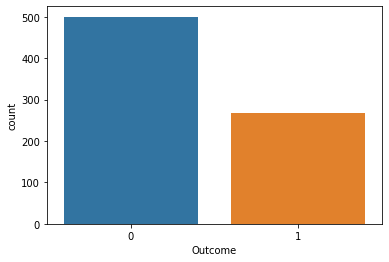

In [9]:
import seaborn as sns
sns.countplot(diabetes['Outcome'], label = 'Count')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'],
                                                   diabetes['Outcome'], stratify=diabetes['Outcome'],
                                                   random_state=66)

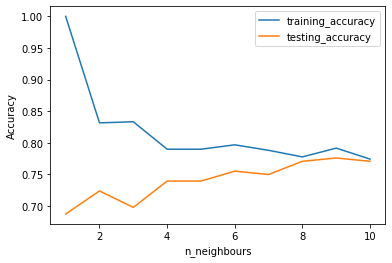

In [11]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
testing_accuracy = []
# try n_neighbours from 1 to 10
neighbours_settings = range(1,11)
for i in neighbours_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train,y_train))
    # record testing set accuracy
    testing_accuracy.append(knn.score(X_test,y_test))
plt.plot(neighbours_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbours_settings, testing_accuracy, label='testing_accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.legend()


In [12]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7760416666666666

In [13]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on testning set: {:.2f}'.format(knn.score(X_test,y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on testning set: 0.78


In [14]:
knn.predict(X_test)[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [15]:
knn.predict_proba(X_test)[0:5]

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [16]:
y_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[105  20]
 [ 23  44]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       125
           1       0.69      0.66      0.67        67

    accuracy                           0.78       192
   macro avg       0.75      0.75      0.75       192
weighted avg       0.77      0.78      0.77       192

